### Sentiment Analysis using transformers and BERT

In [1]:
import torch
import numpy as np

# create a random tensor

x = torch.rand(3, 4)


# print the shape of the tensor
print(x.shape)

torch.Size([3, 4])


In [2]:
from transformers import pipeline

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Initialize the sentiment analysis pipeline

In [4]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [5]:
#sample data

data = ["I love you", "I hate you"]

In [6]:
# Perform sentiment analysis

results = sentiment_pipeline(data)
print(results)

[{'label': 'POSITIVE', 'score': 0.9998656511306763}, {'label': 'NEGATIVE', 'score': 0.9991129040718079}]


In [7]:
import pandas as pd

/var/folders/rz/s0bp96rj7619h0gqkqprfgpw0000gn/T/ipykernel_60585/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [8]:
#Load dataset

data = pd.read_csv("tweets.csv")

In [9]:
data.shape

(27481, 10)

In [10]:
data.dtypes

textID               object
text                 object
selected_text        object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020      int64
Land Area (Km�)     float64
Density (P/Km�)       int64
dtype: object

In [11]:
data['text'] = data['text'].astype(str)

In [12]:
#data['Sentiment'] = data['text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])
#print(data[['text', 'Sentiment']].head())

### We can use BERTweet which is a model specifically fine-tuned for understanding sentiments in tweets

In [13]:
#Initialize BERTweet for sentiment analysis
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [14]:
# Apply the model for each text in the dataframe

#for text in data['text']:
#    result  = sentiment_analysis(text)
#    print(f"Text: {text}, Sentiment: {result[0]['label']}, Confidence: {result[0]['score']}")

In [15]:
# Prepare lists to store results
sentiment_label = []
confidence_score = []

In [16]:
# Analyze sentiment and store results
for text in data['text']:
    result = sentiment_analysis(text)
    sentiment_label.append(result[0]['label'])
    confidence_score.append(result[0]['score'])
# Create a new DataFrame with sentiment results
summary_df = pd.DataFrame({
    'text': data['text'],
    'Sentiment Label': sentiment_label,
    'Confidence Score': confidence_score
})
# Display the summary DataFrame
print(summary_df)

                                                    text Sentiment Label  \
0                    I`d have responded, if I were going             NEU   
1          Sooo SAD I will miss you here in San Diego!!!             NEG   
2                              my boss is bullying me...             NEG   
3                         what interview! leave me alone             NEG   
4       Sons of ****, why couldn`t they put them on t...             NEG   
...                                                  ...             ...   
27476   wish we could come see u on Denver  husband l...             NEG   
27477   I`ve wondered about rake to.  The client has ...             NEU   
27478   Yay good for both of you. Enjoy the break - y...             POS   
27479                         But it was worth it  ****.             POS   
27480     All this flirting going on - The ATG smiles...             POS   

       Confidence Score  
0              0.964800  
1              0.869415  
2        

In [18]:
dfs=data

In [21]:
dfs.head(2)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km�),Density (P/Km�)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105


In [22]:
df = pd.DataFrame({'text': data['text'],'Time':dfs['Time of Tweet'], 'Age':dfs['Age of User'],'Country':dfs['Country'],'label':sentiment_label,'score':confidence_score,'Density':dfs['Density (P/Km�)']})
# Display the DataFrame
print(df)
df.to_csv('tweet_LLM_dataset.csv')

                                                    text     Time     Age  \
0                    I`d have responded, if I were going  morning    0-20   
1          Sooo SAD I will miss you here in San Diego!!!     noon   21-30   
2                              my boss is bullying me...    night   31-45   
3                         what interview! leave me alone  morning   46-60   
4       Sons of ****, why couldn`t they put them on t...     noon   60-70   
...                                                  ...      ...     ...   
27476   wish we could come see u on Denver  husband l...    night   31-45   
27477   I`ve wondered about rake to.  The client has ...  morning   46-60   
27478   Yay good for both of you. Enjoy the break - y...     noon   60-70   
27479                         But it was worth it  ****.    night  70-100   
27480     All this flirting going on - The ATG smiles...  morning    0-20   

           Country label     score  Density  
0      Afghanistan   NEU  0.9

In [27]:
pip install -U matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.9/158.9 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 16.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.3/259.3 kB 8.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 17.1 MB/s eta 0:00:0000:0100:01
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


   Unnamed: 0                                               text     Time  \
0           0                I`d have responded, if I were going  morning   
1           1      Sooo SAD I will miss you here in San Diego!!!     noon   
2           2                          my boss is bullying me...    night   
3           3                     what interview! leave me alone  morning   
4           4   Sons of ****, why couldn`t they put them on t...     noon   

     Age      Country label     score  Density  
0   0-20  Afghanistan   NEU  0.964800       60  
1  21-30      Albania   NEG  0.869415      105  
2  31-45      Algeria   NEG  0.969970       18  
3  46-60      Andorra   NEG  0.933407      164  
4  60-70       Angola   NEG  0.868657       26  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  27481 non-null  int64  
 1   text   

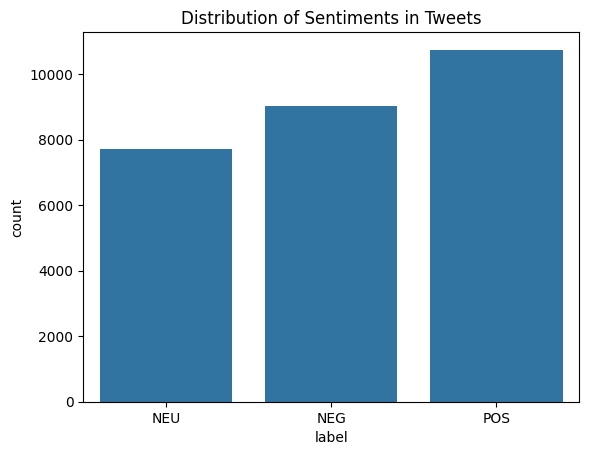

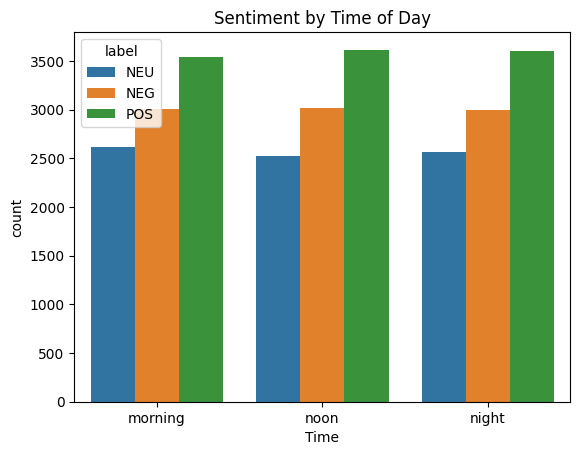

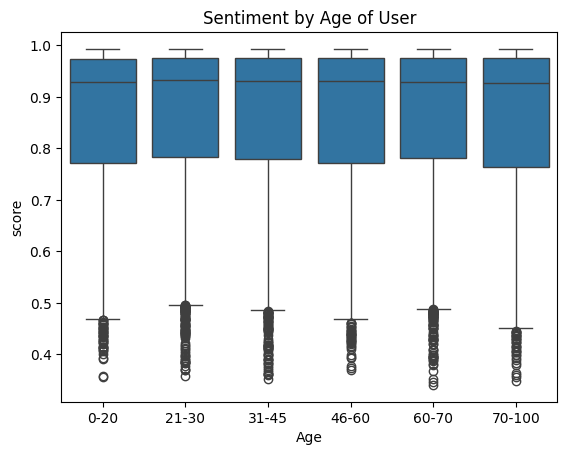

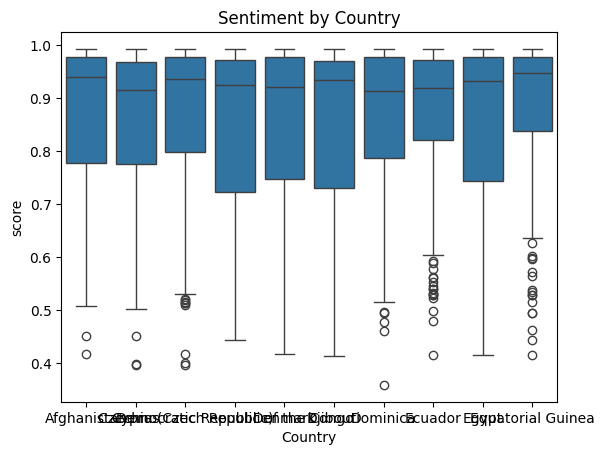

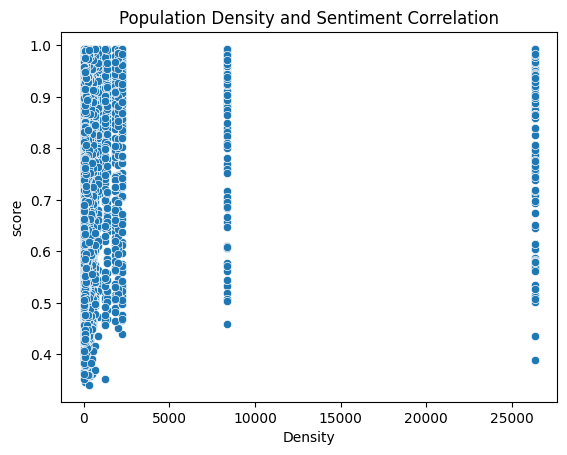

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'tweet_LLM_dataset.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())

# Basic information about the dataset
print(data.info())

# Summary statistics for the numerical columns
print(data.describe())

# Checking for missing values
print(data.isnull().sum())

# Assuming 'sentiment' is a column in your data
sns.countplot(x='label', data=data)
plt.title('Distribution of Sentiments in Tweets')
plt.show()

# Sentiment by Time of Day
sns.countplot(x='Time', hue='label', data=data)
plt.title('Sentiment by Time of Day')
plt.show()

# Sentiment by Age of User
sns.boxplot(x='Age', y='score', data=data)  # 'sentiment_score' would be a numerical representation of sentiment
plt.title('Sentiment by Age of User')
plt.show()

# Sentiment by Country
top_countries = data['Country'].value_counts().index[:10]
sns.boxplot(x='Country', y='score', data=data[data['Country'].isin(top_countries)])
plt.title('Sentiment by Country')
plt.show()

# Population Density and Sentiment
sns.scatterplot(x='Density', y='score', data=data)
plt.title('Population Density and Sentiment Correlation')
plt.show()